In [1]:
# MENTOX Used Car Price Analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# PHASE 1: DATA LOADING & INSPECTION

In [3]:
# Loading the dataset 
df = pd.read_csv('cardekho_dataset.csv')  

print(f"\n Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic info
print(df.info())

print(df.head())

print(df.describe())


 Dataset Overview:
Shape: (15411, 14)
Columns: ['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-nul

In [4]:
# PHASE 2: DATA CLEANING & ASSESSMENT

In [5]:

# Check for missing values
print("\n Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame( {
                'Missing_Count': missing_data,
                'Missing_Percentage': missing_percent}).sort_values('Missing_Percentage', ascending=False)

print("Display only columns with missing values:")
print(missing_summary[missing_summary['Missing_Count'] > 0]) 

print("\nTotal Missing Values:", missing_data.sum())

# Check data types and unique values
print(f"\n Data Types and Unique Values:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {df[col].dtype} | Unique values: {unique_count}")
    if unique_count < 20 and col not in ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']:
        print(f"  → Values: {sorted(df[col].unique())}")

print(f"\n Handling Missing Values:")

# Creating a copy for cleaning
df_clean = df.copy()

# Remove any completely duplicate rows
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Removed {initial_rows - len(df_clean)} duplicate rows")

# Handle missing values in numeric columns
numeric_cols = ['mileage', 'engine', 'max_power', 'km_driven', 'selling_price']
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Filled {col} missing values with median: {median_val}")

# Handle missing values in categorical columns
categorical_cols = ['fuel_type', 'transmission_type', 'seller_type']
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_val}")

        


 Missing Values Analysis:
Display only columns with missing values:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Total Missing Values: 0

 Data Types and Unique Values:
Unnamed: 0: int64 | Unique values: 15411
car_name: object | Unique values: 121
brand: object | Unique values: 32
model: object | Unique values: 120
vehicle_age: int64 | Unique values: 24
km_driven: int64 | Unique values: 3688
seller_type: object | Unique values: 3
  → Values: ['Dealer', 'Individual', 'Trustmark Dealer']
fuel_type: object | Unique values: 5
  → Values: ['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol']
transmission_type: object | Unique values: 2
  → Values: ['Automatic', 'Manual']
mileage: float64 | Unique values: 411
engine: int64 | Unique values: 110
max_power: float64 | Unique values: 342
seats: int64 | Unique values: 8
  → Values: [0, 2, 4, 5, 6, 7, 8, 9]
selling_price: int64 | Unique values: 1086

 Handling Missing Values:
Removed 0 duplicate rows


In [6]:

# Printing the organized summary of data types and missing values

print("\n" + "="*80)
print("DATA TYPES AND MISSING VALUES SUMMARY".center(80))
print("="*80)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
})

# Add value lists for categorical columns with few unique values
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count < 20 and col not in ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']:
        summary_df.loc[col, 'Values'] = str(sorted(df[col].unique().tolist()))
    else:
        summary_df.loc[col, 'Values'] = '-'

# Print formatted summary
print("\nColumn-wise Summary:")
print(summary_df.to_string())

print("\n" + "="*80)
print("MISSING VALUES HANDLING SUMMARY".center(80))
print("="*80)

# Print missing value handling steps
print(f"\nDuplicate Rows Removed: {initial_rows - len(df_clean)}")
print("\nMissing Values Filled:")
print("-" * 50)
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        print(f"• {col}: {df[col].isnull().sum()} values filled with median ({df[col].median():.2f})")
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        print(f"• {col}: {df[col].isnull().sum()} values filled with mode ({df[col].mode()[0]})")
print("="*80)




                     DATA TYPES AND MISSING VALUES SUMMARY                      

Column-wise Summary:
                  Data Type  Unique Values  Missing Values  Missing %                                          Values
Unnamed: 0            int64          15411               0        0.0                                               -
car_name             object            121               0        0.0                                               -
brand                object             32               0        0.0                                               -
model                object            120               0        0.0                                               -
vehicle_age           int64             24               0        0.0                                               -
km_driven             int64           3688               0        0.0                                               -
seller_type          object              3               0        0.0 

In [7]:
# OUTLIER DETECTION AND TREATMENT

selling_price: 1386 outliers (< -275000 or > 1485000)
km_driven: 466 outliers (< -30000 or > 130000)
mileage: 88 outliers (< 8 or > 31)
engine: 2130 outliers (< 620 or > 2160)
max_power: 867 outliers (< 9 or > 182)


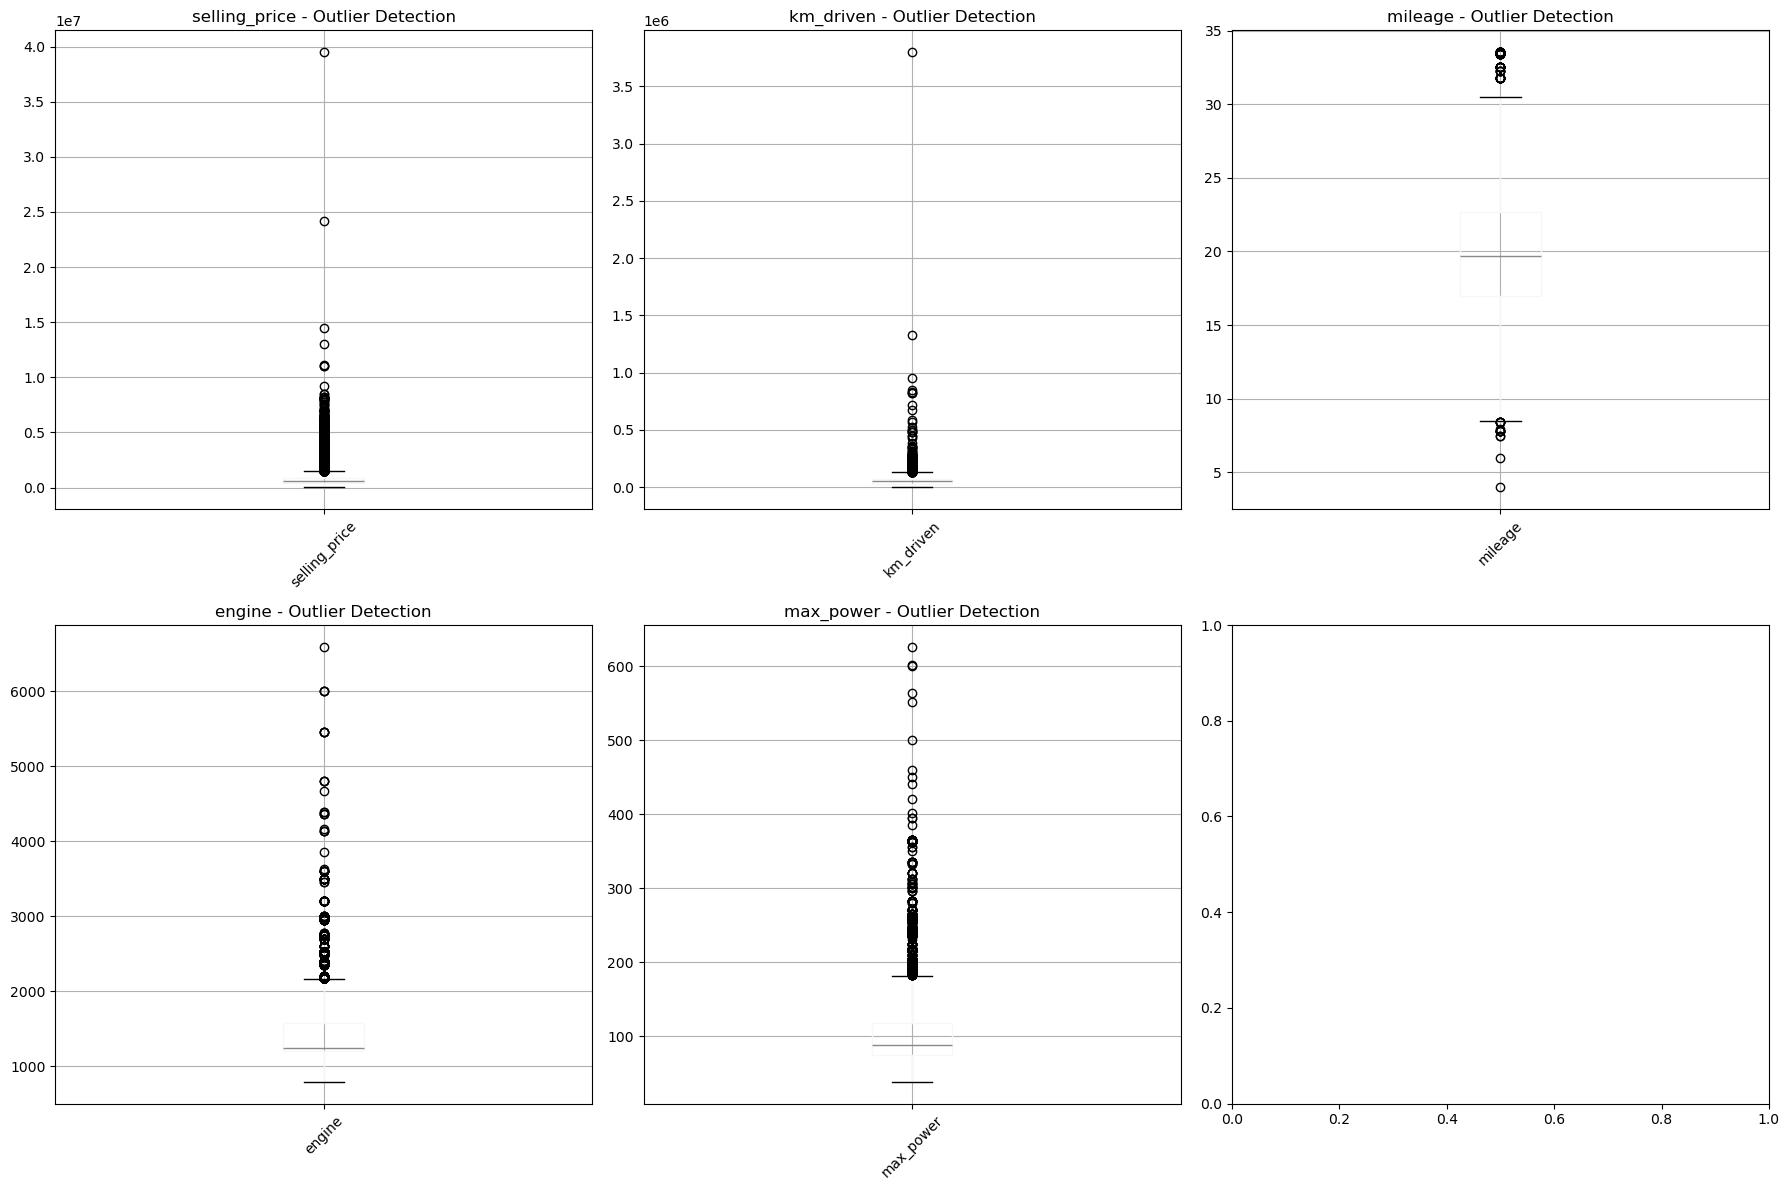


 Handling Extreme Outliers:
selling_price: Handled 1386 outliers by capping at -275000 and 1485000
km_driven: Handled 466 outliers by capping at -30000 and 130000
mileage: Handled 88 outliers by capping at 8 and 31
engine: Handled 2130 outliers by capping at 620 and 2160
max_power: Handled 867 outliers by capping at 9 and 182


In [8]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, len(outliers)

# Check outliers in key numeric columns
outlier_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']
for col in outlier_columns:
    if col in df_clean.columns:
        lower, upper, outlier_count = detect_outliers_iqr(df_clean, col)
        print(f"{col}: {outlier_count} outliers (< {lower:.0f} or > {upper:.0f})")

# Visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(outlier_columns):
    if i < len(axes) and col in df_clean.columns:
        df_clean.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col} - Outlier Detection')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Handle outliers using IQR method
print(f"\n Handling Extreme Outliers:")
for col in outlier_columns:
    if col in df_clean.columns:
        lower, upper, outlier_count = detect_outliers_iqr(df_clean, col)
        df_clean[col] = np.where(df_clean[col] < lower, lower, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper, upper, df_clean[col])
        print(f"{col}: Handled {outlier_count} outliers by capping at {lower:.0f} and {upper:.0f}")


In [9]:
# PHASE 3: EXPLORATORY DATA ANALYSIS


 Univariate Analysis:


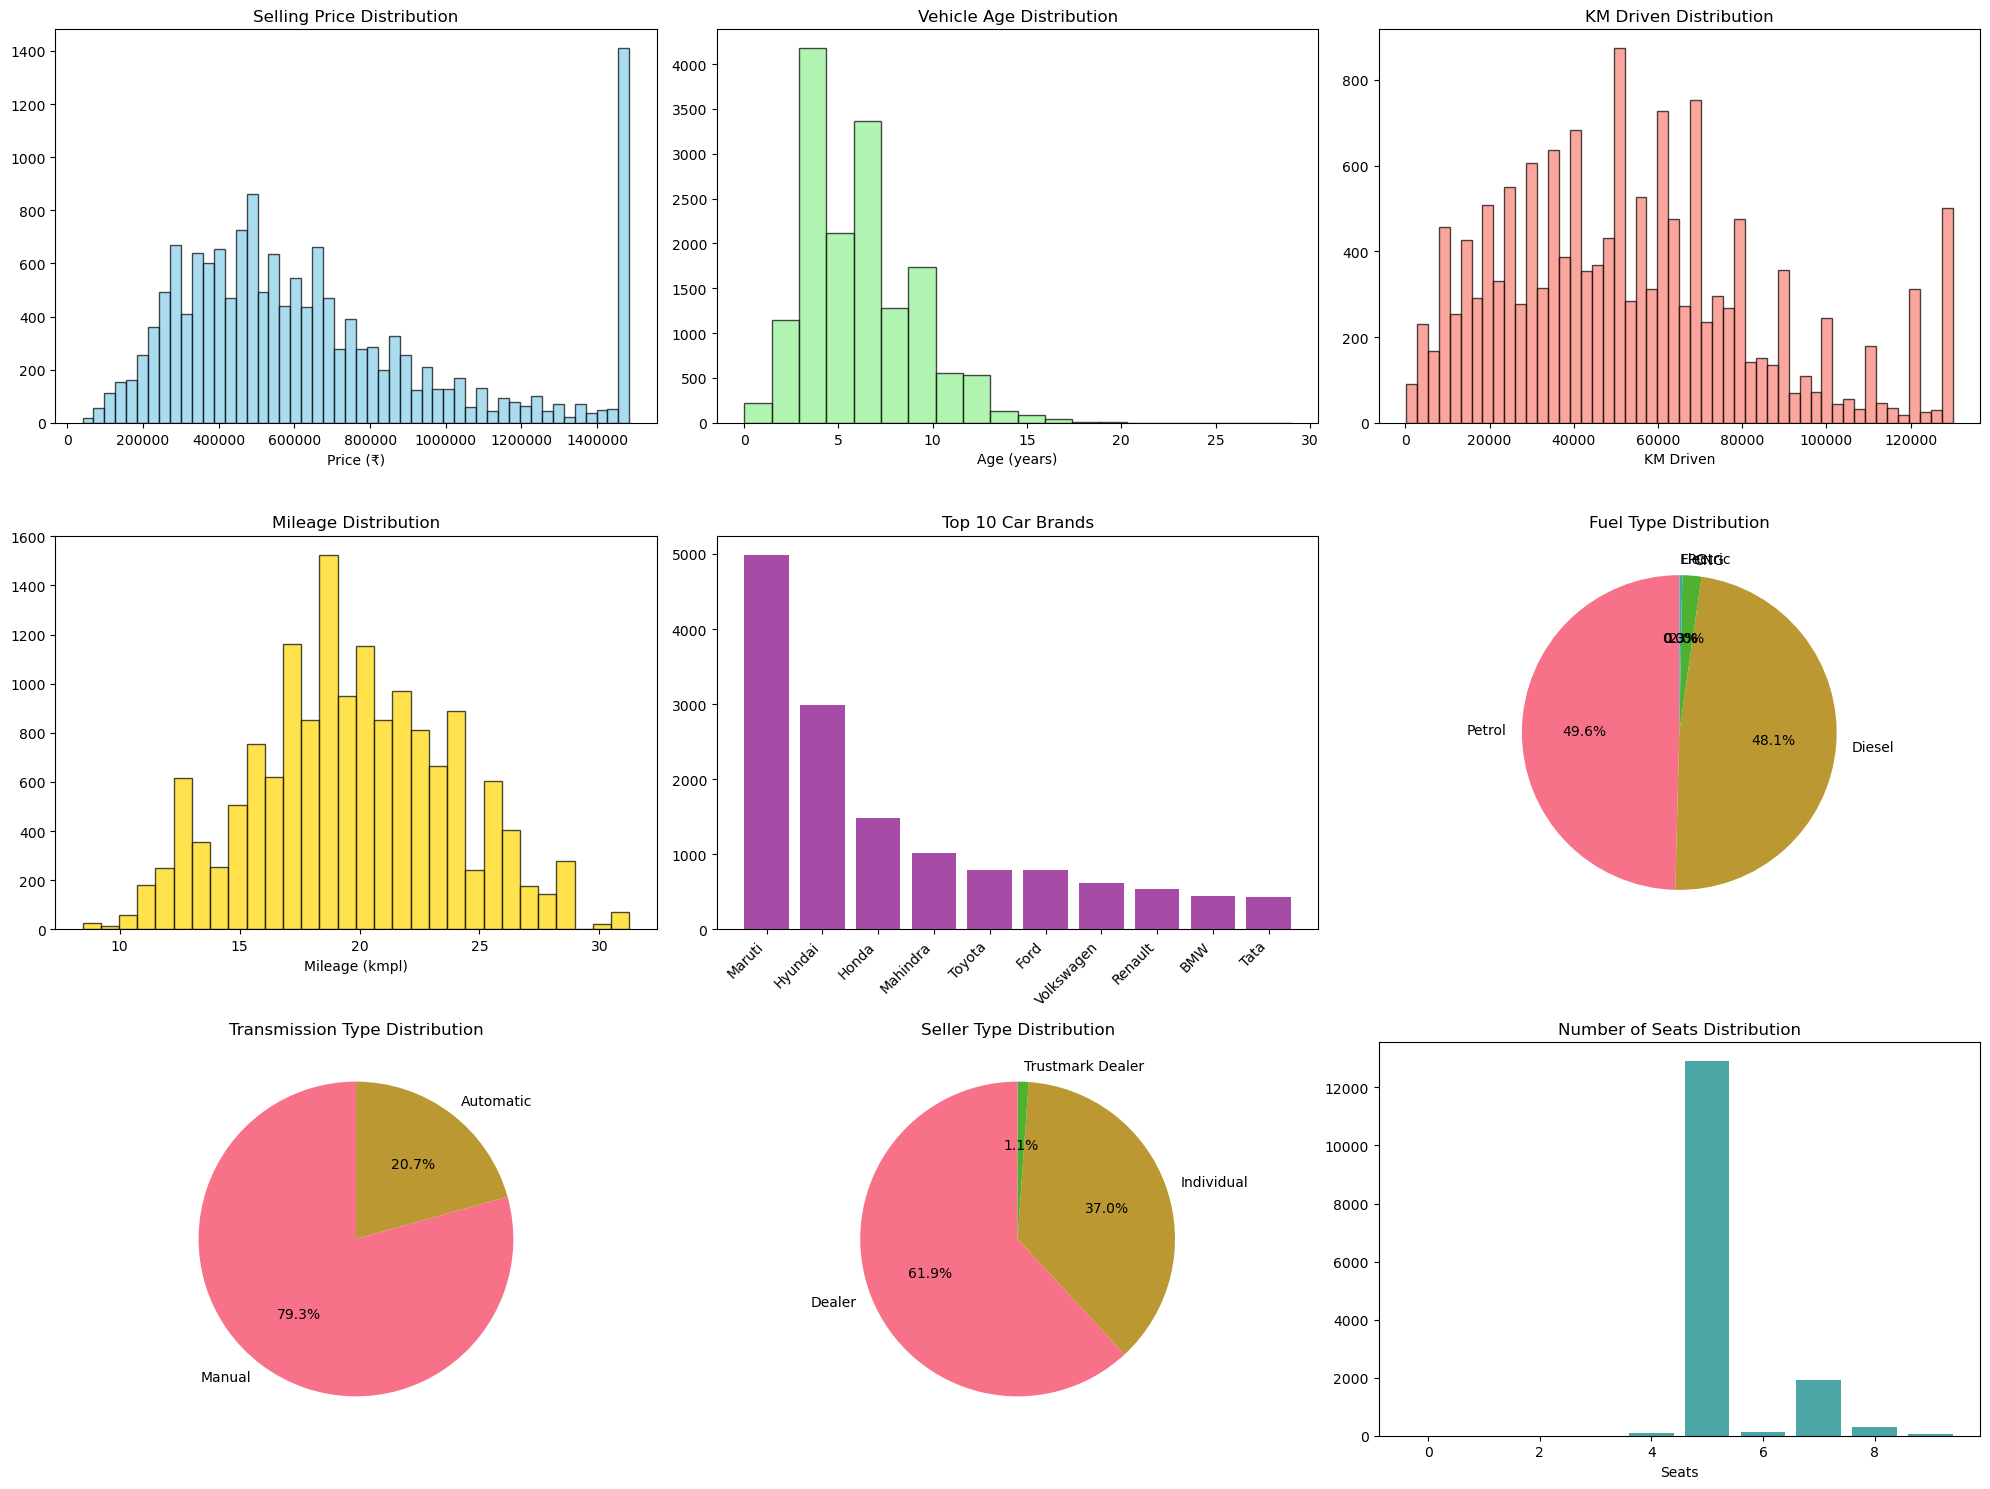

In [10]:

print(f"\n Univariate Analysis:")

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

# Price distribution
axes[0].hist(df_clean['selling_price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Selling Price Distribution')
axes[0].set_xlabel('Price (₹)')
axes[0].ticklabel_format(style='plain', axis='x')

# Vehicle age distribution
axes[1].hist(df_clean['vehicle_age'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Vehicle Age Distribution')
axes[1].set_xlabel('Age (years)')

# KM driven distribution
axes[2].hist(df_clean['km_driven'], bins=50, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('KM Driven Distribution')
axes[2].set_xlabel('KM Driven')

# Mileage distribution
axes[3].hist(df_clean['mileage'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[3].set_title('Mileage Distribution')
axes[3].set_xlabel('Mileage (kmpl)')

# Brand distribution (top 10)
brand_counts = df_clean['brand'].value_counts().head(10)
axes[4].bar(range(len(brand_counts)), brand_counts.values, color='purple', alpha=0.7)
axes[4].set_xticks(range(len(brand_counts)))
axes[4].set_xticklabels(brand_counts.index, rotation=45, ha='right')
axes[4].set_title('Top 10 Car Brands')

# Fuel type distribution
fuel_counts = df_clean['fuel_type'].value_counts()
axes[5].pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
axes[5].set_title('Fuel Type Distribution')

# Transmission type distribution
trans_counts = df_clean['transmission_type'].value_counts()
axes[6].pie(trans_counts.values, labels=trans_counts.index, autopct='%1.1f%%', startangle=90)
axes[6].set_title('Transmission Type Distribution')

# Seller type distribution
seller_counts = df_clean['seller_type'].value_counts()
axes[7].pie(seller_counts.values, labels=seller_counts.index, autopct='%1.1f%%', startangle=90)
axes[7].set_title('Seller Type Distribution')

# Seats distribution
seats_counts = df_clean['seats'].value_counts().sort_index()
axes[8].bar(seats_counts.index, seats_counts.values, color='teal', alpha=0.7)
axes[8].set_title('Number of Seats Distribution')
axes[8].set_xlabel('Seats')

plt.tight_layout()
plt.show()


 Bivariate Analysis:


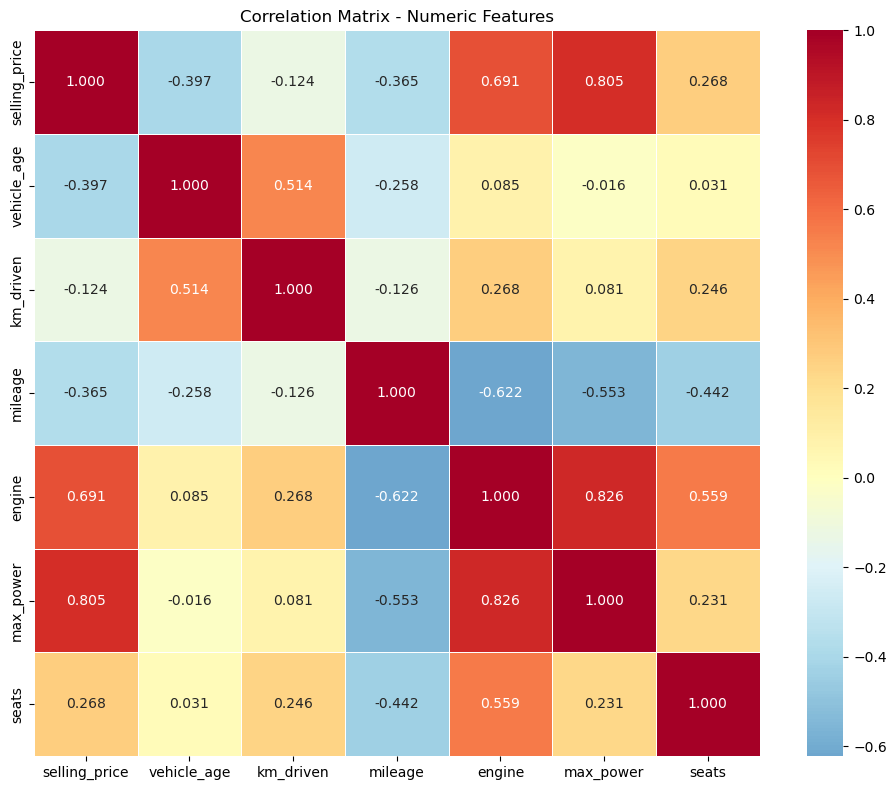


 Key Correlations with Selling Price:
  max_power: 0.805 (Positive, Strong)
  engine: 0.691 (Positive, Strong)
  seats: 0.268 (Positive, Weak)
  km_driven: -0.124 (Negative, Weak)
  mileage: -0.365 (Negative, Moderate)
  vehicle_age: -0.397 (Negative, Moderate)


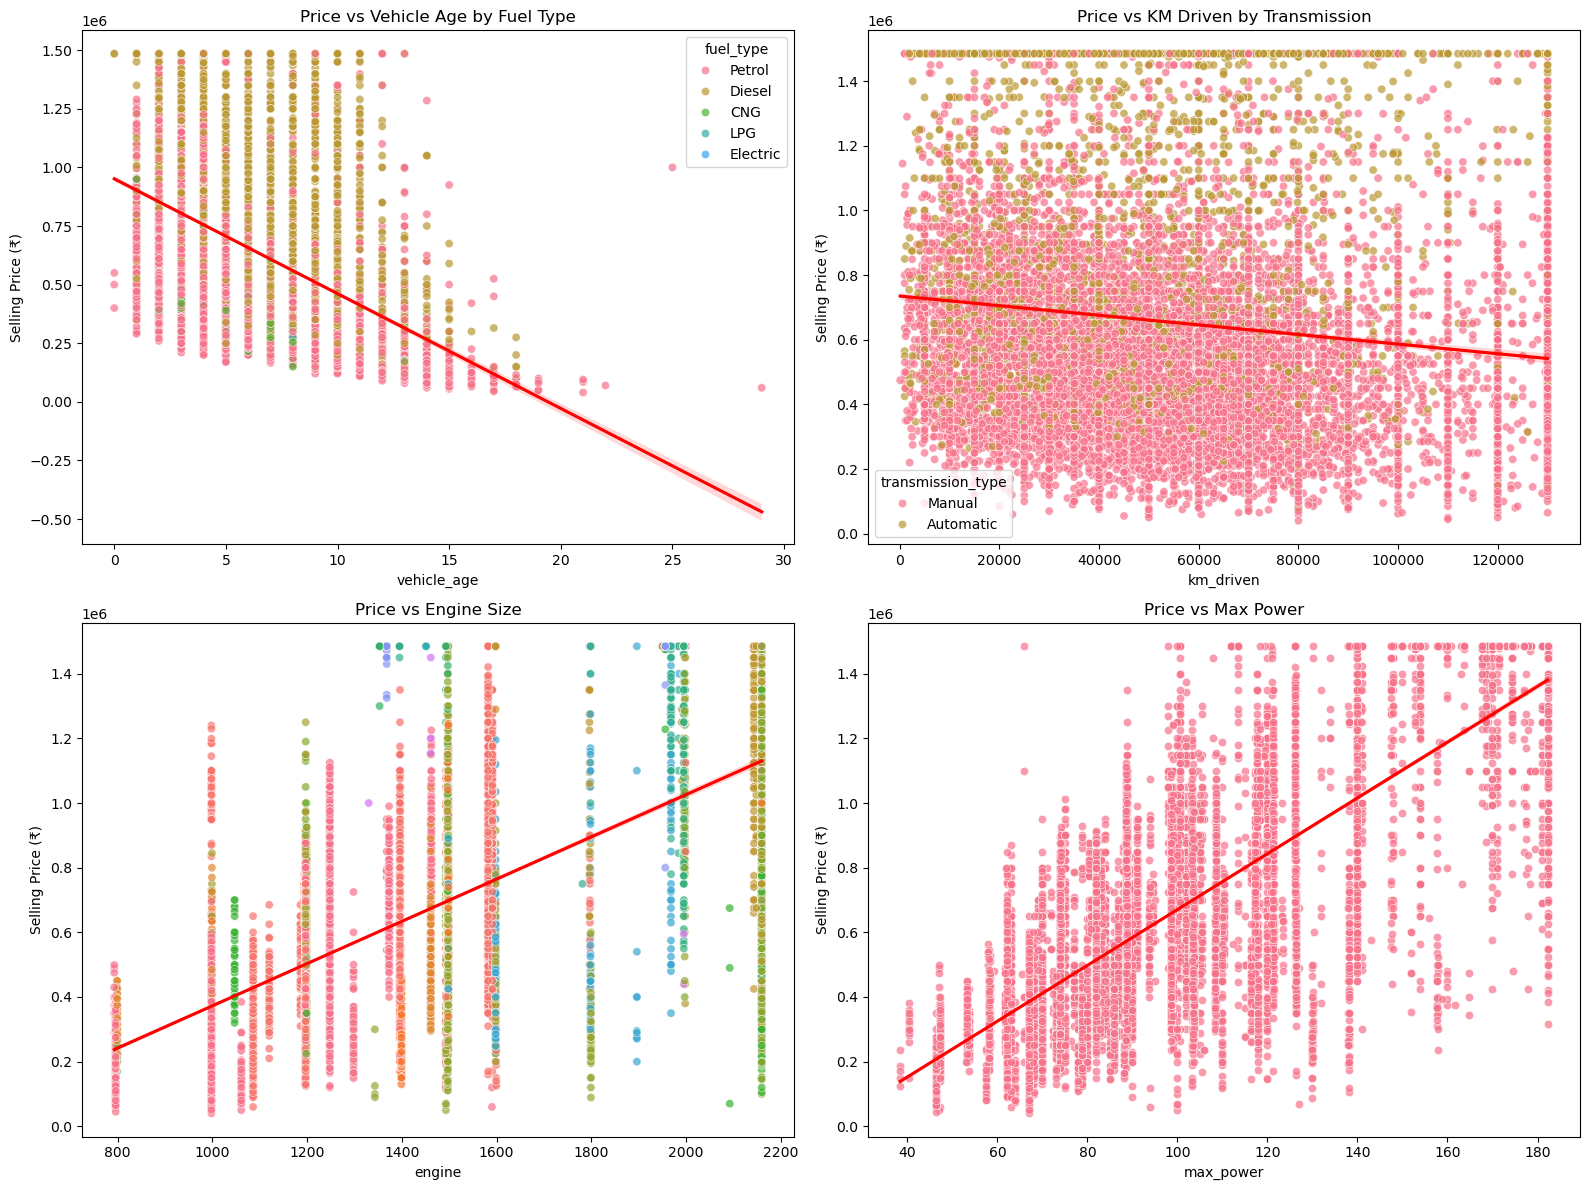

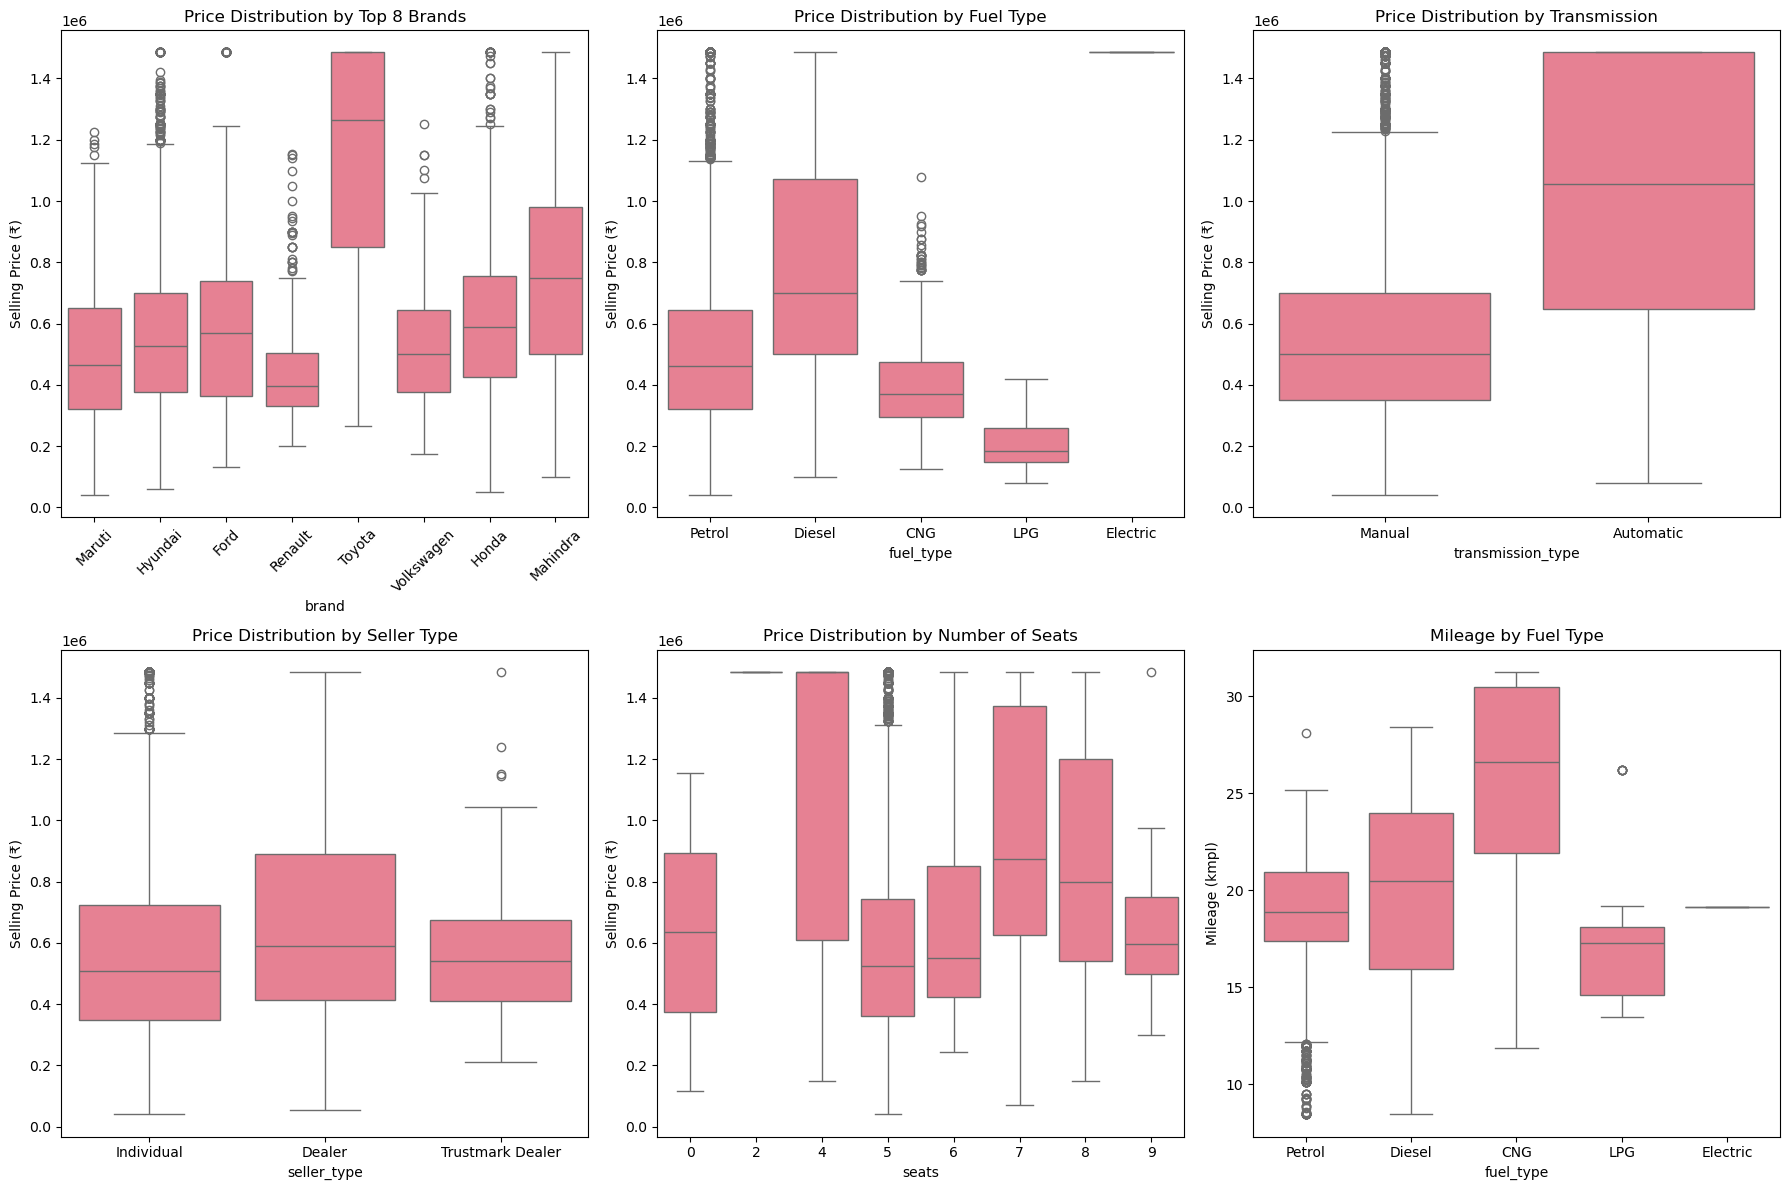

In [11]:
print(f"\n Bivariate Analysis:")

# Create correlation matrix
numeric_features = ['selling_price', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
corr_matrix = df_clean[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix - Numeric Features')
plt.tight_layout()
plt.show()


print(f"\n Key Correlations with Selling Price:")
price_corr = corr_matrix['selling_price'].sort_values(ascending=False)
for feature, corr in price_corr.items():
    if feature != 'selling_price':
        direction = "Positive" if corr > 0 else "Negative"
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"  {feature}: {corr:.3f} ({direction}, {strength})")

# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price vs Vehicle Age
sns.scatterplot(data=df_clean, x='vehicle_age', y='selling_price', 
                hue='fuel_type', alpha=0.7, ax=axes[0,0])
sns.regplot(data=df_clean, x='vehicle_age', y='selling_price', 
            scatter=False, color='red', ax=axes[0,0])
axes[0,0].set_title('Price vs Vehicle Age by Fuel Type')
axes[0,0].set_ylabel('Selling Price (₹)')

# Price vs KM Driven
sns.scatterplot(data=df_clean, x='km_driven', y='selling_price', 
                hue='transmission_type', alpha=0.7, ax=axes[0,1])
sns.regplot(data=df_clean, x='km_driven', y='selling_price', 
            scatter=False, color='red', ax=axes[0,1])
axes[0,1].set_title('Price vs KM Driven by Transmission')
axes[0,1].set_ylabel('Selling Price (₹)')

# Price vs Engine Size
sns.scatterplot(data=df_clean, x='engine', y='selling_price', 
                hue='brand', alpha=0.7, ax=axes[1,0], legend=False)
sns.regplot(data=df_clean, x='engine', y='selling_price', 
            scatter=False, color='red', ax=axes[1,0])
axes[1,0].set_title('Price vs Engine Size')
axes[1,0].set_ylabel('Selling Price (₹)')

# Price vs Max Power
sns.scatterplot(data=df_clean, x='max_power', y='selling_price', 
                alpha=0.7, ax=axes[1,1])
sns.regplot(data=df_clean, x='max_power', y='selling_price', 
            scatter=False, color='red', ax=axes[1,1])
axes[1,1].set_title('Price vs Max Power')
axes[1,1].set_ylabel('Selling Price (₹)')

plt.tight_layout()
plt.show()

# Boxplots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price by Brand (top 8)
top_brands = df_clean['brand'].value_counts().head(8).index
df_top_brands = df_clean[df_clean['brand'].isin(top_brands)]
sns.boxplot(data=df_top_brands, x='brand', y='selling_price', ax=axes[0,0])
axes[0,0].set_title('Price Distribution by Top 8 Brands')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylabel('Selling Price (₹)')

# Price by Fuel Type
sns.boxplot(data=df_clean, x='fuel_type', y='selling_price', ax=axes[0,1])
axes[0,1].set_title('Price Distribution by Fuel Type')
axes[0,1].set_ylabel('Selling Price (₹)')

# Price by Transmission
sns.boxplot(data=df_clean, x='transmission_type', y='selling_price', ax=axes[0,2])
axes[0,2].set_title('Price Distribution by Transmission')
axes[0,2].set_ylabel('Selling Price (₹)')

# Price by Seller Type
sns.boxplot(data=df_clean, x='seller_type', y='selling_price', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Seller Type')
axes[1,0].set_ylabel('Selling Price (₹)')

# Price by Seats
sns.boxplot(data=df_clean, x='seats', y='selling_price', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Number of Seats')
axes[1,1].set_ylabel('Selling Price (₹)')

# Mileage vs Fuel Type
sns.boxplot(data=df_clean, x='fuel_type', y='mileage', ax=axes[1,2])
axes[1,2].set_title('Mileage by Fuel Type')
axes[1,2].set_ylabel('Mileage (kmpl)')

plt.tight_layout()
plt.show()

In [12]:
# PHASE 4: FEATURE ENGINEERING

In [13]:
# Create feature-engineered dataset
df_featured = df_clean.copy()

# 1. Price per kilometer
df_featured['price_per_km'] = df_featured['selling_price'] / (df_featured['km_driven'] + 1)

# 2. Age categories
df_featured['age_category'] = pd.cut(df_featured['vehicle_age'], 
                                   bins=[0, 3, 7, 12, float('inf')],
                                   labels=['New', 'Recent', 'Mature', 'Old'])

# 3. Mileage categories  
df_featured['mileage_category'] = pd.cut(df_featured['mileage'],
                                       bins=[0, 15, 20, 25, float('inf')],
                                       labels=['Low', 'Average', 'Good', 'Excellent'])

# 4. Luxury brand indicator
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Jaguar', 'Volvo', 'Lexus', 'Mini']
df_featured['is_luxury'] = df_featured['brand'].isin(luxury_brands).astype(int)

# 5. High-performance indicator
df_featured['is_high_performance'] = (df_featured['max_power'] > df_featured['max_power'].quantile(0.75)).astype(int)

# 6. Low mileage indicator (fuel efficiency)
df_featured['is_fuel_efficient'] = (df_featured['mileage'] > df_featured['mileage'].quantile(0.75)).astype(int)

print(f"Created new features:")
new_features = ['price_per_km', 'age_category', 'mileage_category', 
                'is_luxury', 'is_high_performance', 'is_fuel_efficient']
for feature in new_features:
    print(f"   {feature}")

# Display sample of new features
print(f"\n Sample of engineered features:")
print(df_featured[new_features].head())

Created new features:
   price_per_km
   age_category
   mileage_category
   is_luxury
   is_high_performance
   is_fuel_efficient

 Sample of engineered features:
   price_per_km age_category mileage_category  is_luxury  is_high_performance  \
0      0.999992       Mature          Average          0                    0   
1     27.498625       Recent          Average          0                    0   
2      3.583274       Mature          Average          0                    0   
3      6.107943       Mature             Good          0                    0   
4     18.999367       Recent             Good          0                    0   

   is_fuel_efficient  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1  


In [14]:
# FEATURE ENCODING & SCALING

In [15]:
print(f"\n Feature Encoding & Scaling:")

# One-hot encoding for categorical variables
categorical_features = ['brand', 'fuel_type', 'transmission_type', 'seller_type', 
                       'age_category', 'mileage_category']

df_encoded = pd.get_dummies(df_featured, columns=categorical_features, prefix=categorical_features)
print(f"One-hot encoded {len(categorical_features)} categorical features")
print(f"Dataset shape after encoding: {df_encoded.shape}")

# Select features for modeling
feature_columns = [col for col in df_encoded.columns if col != 'selling_price' and col not in ['car_name', 'model']]
X = df_encoded[feature_columns]
y = df_encoded['selling_price']

# Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print(f"Scaled {len(feature_columns)} features using StandardScaler")
print(f"Final feature set shape: {X_scaled.shape}")


 Feature Encoding & Scaling:
One-hot encoded 6 categorical features
Dataset shape after encoding: (15411, 64)
Scaled 61 features using StandardScaler
Final feature set shape: (15411, 61)


In [16]:
# SAVE PROCESSED DATA

In [17]:
# Save different versions of the dataset
df_clean.to_csv('car_data_cleaned.csv', index=False)
df_featured.to_csv('car_data_featured.csv', index=False)
df_encoded.to_csv('car_data_encoded.csv', index=False)


print("\n Saved datasets:")
print(f"   car_data_cleaned.csv ({df_clean.shape})")
print(f"   car_data_featured.csv ({df_featured.shape})")
print(f"   car_data_encoded.csv ({df_encoded.shape})")


 Saved datasets:
   car_data_cleaned.csv ((15411, 14))
   car_data_featured.csv ((15411, 20))
   car_data_encoded.csv ((15411, 64))


In [18]:
# PROJECT SUMMARY

In [19]:


summary_stats = {
    'Original dataset shape': df.shape,
    'Final processed shape': df_encoded.shape,
    'Missing values handled': missing_data.sum(),
    'Features engineered': len(new_features),
    'Categorical features encoded': len(categorical_features),
    'Final feature count': len(feature_columns),
    'Price range': f"₹{df_clean['selling_price'].min():,.0f} - ₹{df_clean['selling_price'].max():,.0f}",
    'Average price': f"₹{df_clean['selling_price'].mean():,.0f}",
    'Average vehicle age': f"{df_clean['vehicle_age'].mean():.1f} years",
    'Average mileage': f"{df_clean['mileage'].mean():.1f} kmpl"
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

print(f"\n Key Insights:")
print(f"  • Most common brand: {df_clean['brand'].mode()[0]}")
print(f"  • Most common fuel type: {df_clean['fuel_type'].mode()[0]}")
print(f"  • Average vehicle age: {df_clean['vehicle_age'].mean():.1f} years")
print(f"  • Average mileage: {df_clean['mileage'].mean():.1f} kmpl")
print(f"  • Luxury cars in dataset: {df_featured['is_luxury'].sum()} ({df_featured['is_luxury'].mean()*100:.1f}%)")




Original dataset shape: (15411, 14)
Final processed shape: (15411, 64)
Missing values handled: 0
Features engineered: 6
Categorical features encoded: 6
Final feature count: 61
Price range: ₹40,000 - ₹1,485,000
Average price: ₹655,764
Average vehicle age: 6.0 years
Average mileage: 19.7 kmpl

 Key Insights:
  • Most common brand: Maruti
  • Most common fuel type: Petrol
  • Average vehicle age: 6.0 years
  • Average mileage: 19.7 kmpl
  • Luxury cars in dataset: 1074 (7.0%)
